<a href="https://colab.research.google.com/github/ZZongSeung/NL-s/blob/main/lstm%EC%9C%BC%EB%A1%9C_%EC%9E%90%EC%97%B0%EC%96%B4_%EC%B2%98%EB%A6%AC%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam #최적화 함수

import os
from tqdm import tqdm # 실행값에 대한 시간을 확인하는 방법

In [2]:
for i in tqdm(range(20)):
  print(i)

100%|██████████| 20/20 [00:00<00:00, 46167.35it/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [3]:
# data settting
df = pd.read_csv("/content/exercise4.csv")

In [4]:
df

,processed,label
0,One reviewer mentioned watching Oz episode hoo...,1
1,A wonderful little production . The filming te...,1
2,I thought wonderful way spend time hot summer ...,1
3,Basically family little boy Jake think zombie ...,0
4,Petter Mattei Love Time Money visually stunnin...,1
...,...,...
49995,I thought movie right good job . It creative o...,1
49996,"Bad plot , bad dialogue , bad acting , idiotic...",0
49997,I Catholic taught parochial elementary school ...,0
49998,I going disagree previous comment side Maltin ...,0


#1. 데이터 전처리 단계
 - 미사여구 삭제
 - 대문자-> 소문자로 통일?
 -

In [5]:
df["processed"]= df["processed"].str.lower()
df["processed"] = df["processed"].str.replace("[^a-zA-Z]"," ",regex = True)

In [6]:
df["processed"][0]

'one reviewer mentioned watching oz episode hooked   they right   exactly happened   the first thing struck oz brutality unflinching scene violence   set right word go   trust   show faint hearted timid   this show pull punch regard drug   sex violence   its hardcore   classic use word   it called oz nickname given oswald maximum security state penitentary   it focus mainly emerald city   experimental section prison cell glass front face inwards   privacy high agenda   em city home many     aryans   muslims   gangsta   latinos   christians   italians   irish         scuffle   death stare   dodgy dealing shady agreement never far away   i would say main appeal show due fact go show dare   forget pretty picture painted mainstream audience   forget charm   forget romance       oz mess around   the first episode i ever saw struck nasty surreal   i say i ready   i watched   i developed taste oz   got accustomed high level graphic violence   not violence   injustice crooked guard sold nickel

In [7]:
# 사전생성 - > 쪼개주는 역할 실시
reviews = df["processed"].values

In [8]:
word = " ".join(reviews).split() # 한개의 list를 변경해야 함 : ㅓㅐㅑ

In [9]:
word

['one',
 'reviewer',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'hooked',
 'they',
 'right',
 'exactly',
 'happened',
 'the',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scene',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'this',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violence',
 'its',
 'hardcore',
 'classic',
 'use',
 'word',
 'it',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'it',
 'focus',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangsta',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'never',
 'far',
 'away',
 'i',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',


In [10]:
from collections import Counter
counter = Counter(word)

In [11]:
vocab = sorted(counter, key = counter.get, reverse=True) # value값을 기준으로 정렬

In [12]:
int2word = {}

for i in range(len(vocab)):
  int2word[vocab[i]] = i+1

int2word["<PAD>"] = 0

In [13]:
word2int = int2word.copy()

In [14]:
word2int["one"], word2int["reviewer"], word2int["mentioned"] # 적절한 숫자로 변형시키기

(5, 1095, 972)

In [15]:
word2int

{'i': 1,
 'movie': 2,
 'film': 3,
 'the': 4,
 'one': 5,
 'like': 6,
 'it': 7,
 'time': 8,
 'this': 9,
 'good': 10,
 'character': 11,
 'story': 12,
 'even': 13,
 'get': 14,
 'would': 15,
 'make': 16,
 'see': 17,
 'really': 18,
 'scene': 19,
 'well': 20,
 'much': 21,
 'bad': 22,
 'people': 23,
 'great': 24,
 'also': 25,
 'first': 26,
 'show': 27,
 'way': 28,
 'made': 29,
 'thing': 30,
 'could': 31,
 'life': 32,
 'think': 33,
 'go': 34,
 'but': 35,
 'know': 36,
 'watch': 37,
 'and': 38,
 'love': 39,
 'plot': 40,
 'two': 41,
 'actor': 42,
 'many': 43,
 'seen': 44,
 'a': 45,
 'say': 46,
 'year': 47,
 'never': 48,
 'end': 49,
 'acting': 50,
 'look': 51,
 'best': 52,
 'little': 53,
 'in': 54,
 'there': 55,
 'ever': 56,
 'man': 57,
 'better': 58,
 'take': 59,
 'if': 60,
 'come': 61,
 'work': 62,
 'still': 63,
 'he': 64,
 'part': 65,
 'something': 66,
 'find': 67,
 'director': 68,
 'want': 69,
 'back': 70,
 'give': 71,
 'lot': 72,
 'real': 73,
 'watching': 74,
 'guy': 75,
 'performance': 76,
 '

In [16]:
# word <-> int type matching

review_enc=[[word2int[j] for j in review.split()] for review in reviews]

In [17]:
df["encode"] = review_enc

# 긴 길이 맞춰주기

In [18]:
np.full((len(reviews), 128), 1, dtype=int).shape # (50000, 128)

(50000, 128)

In [19]:
np.array(review_enc[0])[:500]

array([    5,  1095,   972,    74,  2893,   186,  2982,   119,   114,
         538,   511,     4,    26,    30,  3018,  2893,  4939, 13580,
          19,   487,   125,   114,   272,    34,  1585,    27,  6181,
        2195, 10419,     9,    27,   954,  2010,  2159,   614,   284,
         487,   703,  3553,   240,   278,   272,     7,   351,  2893,
        9378,   279, 13341,  6290,  2412,   769, 46325,     7,   786,
        1299, 20114,   418,  4331,  1987,  1052,  1981,  1863,   841,
         246, 46326, 15017,   213,  4098,  2749,   418,   258,    43,
       22444,  7719, 11148, 13828,  4841,  7418,  2304, 20115,   218,
        3950,  6722,  1690,  7936,  7541,    48,   139,   158,     1,
          15,    46,   198,  1103,    27,   590,   100,    34,    27,
        2537,   722,   102,   275,  3863,  2350,   172,   722,  1185,
         722,   720,  2893,   829,   104,     4,    26,   186,     1,
          56,   129,  3018,  1502,  2105,     1,    46,     1,  1468,
           1,   205,

In [20]:
def same_legnth(data, seq_length, pad_id):
  features = np.full((len(data), seq_length), pad_id, dtype=int)

  for i, row in enumerate(data):
    features[i, :len(row)] = np.array(row)[:seq_length]

  return features

In [21]:
features = same_legnth(review_enc, pad_id=word2int['<PAD>'], seq_length=256)

In [22]:
features

array([[   5, 1095,  972, ...,    0,    0,    0],
       [  45,  311,   53, ...,    0,    0,    0],
       [   1,   97,  311, ...,    0,    0,    0],
       ...,
       [   1, 3168, 4064, ...,    0,    0,    0],
       [   1,   86, 2839, ...,    0,    0,    0],
       [ 264,    5, 5445, ...,    0,    0,    0]])

In [23]:
labels = df['label'].to_numpy()
labels

array([1, 1, 1, ..., 0, 0, 0])

In [24]:
train_size = .8
split = int(len(features) * train_size)

train_x, train_y, test_x, test_y = features[:split], labels[:split], features[split:], labels[split:]

# making gval data
split_id = int(len(train_x) * train_size)
train_x, valid_x, train_y, valid_y = train_x[:split_id], train_x[split_id:], train_y[:split_id], train_y[split_id:]

In [25]:
train_y.shape

(32000,)

In [26]:
# cuda
if torch.cuda.is_available()==True:
  device = torch.device("cuda")
  print(device)
else:
  device = torch.device("cpu")
  print(device)

cuda


In [27]:
labels


array([1, 1, 1, ..., 0, 0, 0])

In [28]:
#)
lr = 0.001
batch_size = 128
vocab_size = len(word2int)
embedding_size = 128
dropout=0.25

epochs = 8
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': [],
    'epochs': epochs
}
es_limit = 5
#
trainset = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y)) # torch->numpy 변환
valset = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y)) # torch->numpy 변환
testset = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y)) # torch->numpy 변환

#
train_loader = DataLoader(trainset, shuffle = True, batch_size = 128)
test_loader = DataLoader(testset, shuffle = True, batch_size = 128)
val_loader = DataLoader(valset, shuffle = True, batch_size = 128)

In [29]:
x,y=next(iter(trainset)) #

In [30]:
y.squeeze()

tensor(1)

In [31]:
!nvidia-smi

Sat Aug 24 08:17:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [32]:
import torch
torch.cuda.empty_cache()
torch.cuda.memory_allocated()

0

In [33]:
import torch.nn as nn
class LSTM(nn.Module):
  def __init__(self, vocab_size, embedding_size):
    super(LSTM, self).__init__()
    self.embedding = nn.Embedding(vocab_size, embedding_size)
    self.lstm = nn.LSTM(embedding_size, 128, 2, dropout=0.25, batch_first=True)
    self.dropout = nn.Dropout(0.3)
    self.fc = nn.Linear(128, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = x.long()
    x = self.embedding(x)
    out, _ = self.lstm(x)
    out = out[:,-1,:]
    out = self.dropout(out)
    out = self.fc(out)
    out = self.sigmoid(out)

    return out

In [34]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [35]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

model = LSTM(vocab_size, embedding_size).to(device)
optimizer = Adam(model.parameters(), lr= 1e-1)
loss = nn.BCELoss()

In [36]:
device

device(type='cuda')

In [37]:
model

LSTM(
  (embedding): Embedding(96140, 128)
  (lstm): LSTM(128, 128, num_layers=2, batch_first=True, dropout=0.25)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [38]:
def train_loop(train_loader, loss_fn, model, optim, device):
    model.train()

    train_loss = 0
    train_acc = 0

    for batch, (input, target) in enumerate(train_loader):
        input = input.to(device)
        target = target.to(device)

        pred = model(input)

        loss = loss_fn(pred.squeeze(), target.float())

        optim.zero_grad()
        loss.backward()
        optim.step()

        train_loss += loss.item()

        # y_pred 이진화 (0 또는 1로 변환)
        y_pred = torch.round(pred.squeeze())

        # 정확도 계산
        equals = y_pred == target
        acc = torch.mean(equals.type(torch.FloatTensor)).item()
        train_acc += acc

    # 에폭당 평균 손실 및 정확도 계산
    avg_train_loss = train_loss / len(train_loader)
    avg_train_acc = train_acc / len(train_loader)

    history['train_loss'].append(avg_train_loss)
    history['train_acc'].append(avg_train_acc)

    return avg_train_loss, avg_train_acc

In [39]:
def validation(val_loader, loss_fn, model, device):
    model.eval()

    val_loss = 0
    val_acc = 0

    with torch.no_grad():
        for id, (X, y) in enumerate(val_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred.squeeze(), y.float())

            val_loss += loss.item()

            # y_pred 이진화 (0 또는 1로 변환)
            y_pred = torch.round(y_pred.squeeze())

            # 정확도 계산
            equals = y_pred == y
            acc = torch.mean(equals.type(torch.FloatTensor)).item()  # GPU에서 바로 평균 계산
            val_acc += acc

        # 손실과 정확도를 평균값으로 반환
        avg_val_loss = val_loss / len(val_loader)
        avg_val_acc = val_acc / len(val_loader)

        history['val_loss'].append(avg_val_loss)
        history['val_acc'].append(avg_val_acc)

    return avg_val_loss, avg_val_acc

In [40]:
# train loop
epochloop = tqdm(range(epochs), desc='Training')

# early stop trigger
es_trigger = 0
val_loss_min = torch.inf # 초기값을 무한대로 설정 후 특정조건에 따라 값을 매김.

for e in epochloop:
    train_loss, train_acc = train_loop(train_loader, loss, model, optimizer, device)
    val_loss, val_acc = validation(val_loader, loss, model, device)
    epochloop.write(f'Epoch[{e+1}/{epochs}] Train Loss: {train_loss / len(train_loader):.3f}, Train Acc: {train_acc / len(train_loader):.3f}, Val Loss: {val_loss / len(val_loader):.3f}, Val Acc: {val_acc / len(val_loader):.3f}')

    # save model if validation loss decrease
    if val_loss / len(val_loader) <= val_loss_min:
        torch.save(model.state_dict(), './sentiment_lstm.pt')
        val_loss_min = val_loss / len(val_loader)
        es_trigger = 0
    else:
        es_trigger += 1

    # early stop
    if es_trigger >= es_limit:
        epochloop.write(f'Early stopped at Epoch-{e+1}')
        history['epochs'] = e+1
        break

Training:   0%|          | 0/8 [00:13<?, ?it/s]

Epoch[1/8] Train Loss: 0.003, Train Acc: 0.002, Val Loss: 0.011, Val Acc: 0.008


Training:  25%|██▌       | 2/8 [00:22<01:06, 11.11s/it]

Epoch[2/8] Train Loss: 0.003, Train Acc: 0.002, Val Loss: 0.011, Val Acc: 0.008


Training:  38%|███▊      | 3/8 [00:32<00:51, 10.27s/it]

Epoch[3/8] Train Loss: 0.003, Train Acc: 0.002, Val Loss: 0.011, Val Acc: 0.008


Training:  50%|█████     | 4/8 [00:41<00:39,  9.90s/it]

Epoch[4/8] Train Loss: 0.003, Train Acc: 0.002, Val Loss: 0.011, Val Acc: 0.008


Training:  62%|██████▎   | 5/8 [00:50<00:29,  9.69s/it]

Epoch[5/8] Train Loss: 0.003, Train Acc: 0.002, Val Loss: 0.011, Val Acc: 0.008


Training:  75%|███████▌  | 6/8 [01:00<00:19,  9.68s/it]

Epoch[6/8] Train Loss: 0.003, Train Acc: 0.002, Val Loss: 0.012, Val Acc: 0.008


Training:  75%|███████▌  | 6/8 [01:09<00:23, 11.66s/it]

Epoch[7/8] Train Loss: 0.003, Train Acc: 0.002, Val Loss: 0.011, Val Acc: 0.008
Early stopped at Epoch-7


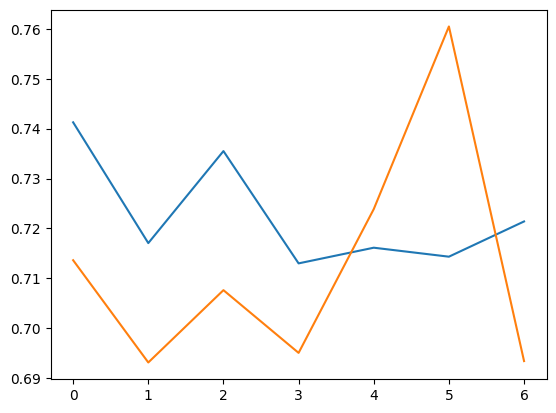

In [44]:
plt.plot(history["train_loss"])
plt.plot(history["val_loss"])

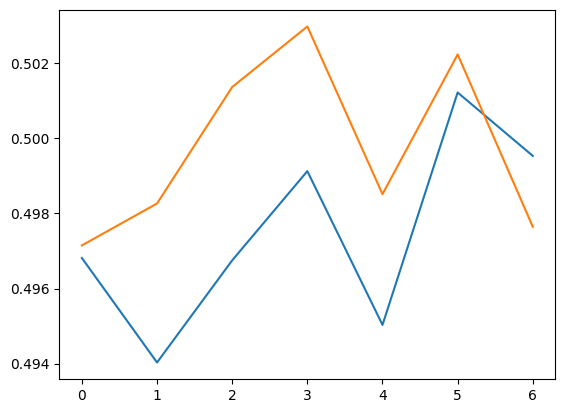

In [45]:
plt.plot(history["train_acc"])
plt.plot(history["val_acc"])